# Malware Prediction using KNN

Working with a Malware Dataset to train a K-Nearest-Neighbor model.



In [32]:
#Import liberies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
#Load the data
file_name = 'malware_dataset_full.csv' # this is the dataset csv file

In [34]:
df = pd.read_csv(file_name)
df.head(5)

,NAME,android.permission.ACCESS_ALL_DOWNLOADS,android.permission.ACCESS_BLUETOOTH_SHARE,android.permission.ACCESS_CACHE_FILESYSTEM,android.permission.ACCESS_CHECKIN_PROPERTIES,android.permission.ACCESS_CONTENT_PROVIDERS_EXTERNALLY,android.permission.ACCESS_DOWNLOAD_MANAGER,android.permission.ACCESS_DOWNLOAD_MANAGER_ADVANCED,android.permission.ACCESS_DRM_CERTIFICATES,android.permission.ACCESS_EPHEMERAL_APPS,...,com.lsbr.ipsos.mobile.permission.C2D_MESSAGE,com.clue.android.permission.C2D_MESSAGE,com.amazon.dcp.metrics.permission.METRICS_PERMISSION,com.amdroidalarmclock.amdroid.permission.C2D_MESSAGE,android.permission.BROADCAST_PACKAGE_REPLACED,com.active.aps.meetmobile.permission.C2D_MESSAGE,com.android.email.permission.READ_ATTACHMENT,android.permission.ACCESS_CORSE_LOCATION,net.hubalek.android.apps.barometer.permission.C2D_MESSAGE,CLASS
0,a.envisionmobile.caa.apk,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,air.G2JCuteBoySwimmingEscape.apk,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,air.G2JSmallBoyFactoryEscape3.apk,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,air.G2JValentineRoseEscape2017.apk,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,air.com.adobe.connectpro.apk,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
df.tail(5) #shows last 5 columns

,NAME,android.permission.ACCESS_ALL_DOWNLOADS,android.permission.ACCESS_BLUETOOTH_SHARE,android.permission.ACCESS_CACHE_FILESYSTEM,android.permission.ACCESS_CHECKIN_PROPERTIES,android.permission.ACCESS_CONTENT_PROVIDERS_EXTERNALLY,android.permission.ACCESS_DOWNLOAD_MANAGER,android.permission.ACCESS_DOWNLOAD_MANAGER_ADVANCED,android.permission.ACCESS_DRM_CERTIFICATES,android.permission.ACCESS_EPHEMERAL_APPS,...,com.lsbr.ipsos.mobile.permission.C2D_MESSAGE,com.clue.android.permission.C2D_MESSAGE,com.amazon.dcp.metrics.permission.METRICS_PERMISSION,com.amdroidalarmclock.amdroid.permission.C2D_MESSAGE,android.permission.BROADCAST_PACKAGE_REPLACED,com.active.aps.meetmobile.permission.C2D_MESSAGE,com.android.email.permission.READ_ATTACHMENT,android.permission.ACCESS_CORSE_LOCATION,net.hubalek.android.apps.barometer.permission.C2D_MESSAGE,CLASS
896,ebc4aa7e93e1d82dba2accced7c68e40.apk,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
897,eda506a6c01c3c7e149ebaebcf929c40.apk,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
898,f3d8eb5c923390534da01d30d7dab130.apk,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
899,fa8d4ee44044b0fad215cbd37b8a9646.apk,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
900,ff6648303056c0f09f584a0d01607bad.apk,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [36]:
# df.shape returns a tuple that indicates the number of rows and cols
df.shape

(901, 1000)

In [37]:
# Get the column names
df.columns
# use df.columns.to_list() to display the entire columns

Index(['NAME', 'android.permission.ACCESS_ALL_DOWNLOADS',
       'android.permission.ACCESS_BLUETOOTH_SHARE',
       'android.permission.ACCESS_CACHE_FILESYSTEM',
       'android.permission.ACCESS_CHECKIN_PROPERTIES',
       'android.permission.ACCESS_CONTENT_PROVIDERS_EXTERNALLY',
       'android.permission.ACCESS_DOWNLOAD_MANAGER',
       'android.permission.ACCESS_DOWNLOAD_MANAGER_ADVANCED',
       'android.permission.ACCESS_DRM_CERTIFICATES',
       'android.permission.ACCESS_EPHEMERAL_APPS',
       ...
       'com.lsbr.ipsos.mobile.permission.C2D_MESSAGE',
       'com.clue.android.permission.C2D_MESSAGE',
       'com.amazon.dcp.metrics.permission.METRICS_PERMISSION',
       'com.amdroidalarmclock.amdroid.permission.C2D_MESSAGE',
       'android.permission.BROADCAST_PACKAGE_REPLACED',
       'com.active.aps.meetmobile.permission.C2D_MESSAGE',
       'com.android.email.permission.READ_ATTACHMENT',
       'android.permission.ACCESS_CORSE_LOCATION',
       'net.hubalek.android.apps.ba

In [38]:
# To find the correlation relationship between columns:
df.corr(numeric_only=True)

,android.permission.ACCESS_ALL_DOWNLOADS,android.permission.ACCESS_BLUETOOTH_SHARE,android.permission.ACCESS_CACHE_FILESYSTEM,android.permission.ACCESS_CHECKIN_PROPERTIES,android.permission.ACCESS_CONTENT_PROVIDERS_EXTERNALLY,android.permission.ACCESS_DOWNLOAD_MANAGER,android.permission.ACCESS_DOWNLOAD_MANAGER_ADVANCED,android.permission.ACCESS_DRM_CERTIFICATES,android.permission.ACCESS_EPHEMERAL_APPS,android.permission.ACCESS_FM_RADIO,...,com.lsbr.ipsos.mobile.permission.C2D_MESSAGE,com.clue.android.permission.C2D_MESSAGE,com.amazon.dcp.metrics.permission.METRICS_PERMISSION,com.amdroidalarmclock.amdroid.permission.C2D_MESSAGE,android.permission.BROADCAST_PACKAGE_REPLACED,com.active.aps.meetmobile.permission.C2D_MESSAGE,com.android.email.permission.READ_ATTACHMENT,android.permission.ACCESS_CORSE_LOCATION,net.hubalek.android.apps.barometer.permission.C2D_MESSAGE,CLASS
android.permission.ACCESS_ALL_DOWNLOADS,1.000000,NaN,NaN,-0.001572,NaN,0.107439,0.706714,NaN,NaN,NaN,...,-0.001572,-0.001572,-0.002726,-0.001572,-0.005707,-0.001572,-0.001572,-0.001572,-0.001572,-0.033491
android.permission.ACCESS_BLUETOOTH_SHARE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
android.permission.ACCESS_CACHE_FILESYSTEM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
android.permission.ACCESS_CHECKIN_PROPERTIES,-0.001572,NaN,NaN,1.000000,NaN,-0.006995,-0.001111,NaN,NaN,NaN,...,-0.001111,-0.001111,-0.001927,-0.001111,-0.004033,-0.001111,-0.001111,-0.001111,-0.001111,0.046945
android.permission.ACCESS_CONTENT_PROVIDERS_EXTERNALLY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
com.active.aps.meetmobile.permission.C2D_MESSAGE,-0.001572,NaN,NaN,-0.001111,NaN,-0.006995,-0.001111,NaN,NaN,NaN,...,-0.001111,-0.001111,-0.001927,-0.001111,-0.004033,1.000000,-0.001111,-0.001111,-0.001111,-0.023668
com.android.email.permission.READ_ATTACHMENT,-0.001572,NaN,NaN,-0.001111,NaN,-0.006995,-0.001111,NaN,NaN,NaN,...,-0.001111,-0.001111,-0.001927,-0.001111,-0.004033,-0.001111,1.000000,-0.001111,-0.001111,-0.023668
android.permission.ACCESS_CORSE_LOCATION,-0.001572,NaN,NaN,-0.001111,NaN,-0.006995,-0.001111,NaN,NaN,NaN,...,-0.001111,-0.001111,-0.001927,-0.001111,-0.004033,-0.001111,-0.001111,1.000000,-0.001111,-0.023668
net.hubalek.android.apps.barometer.permission.C2D_MESSAGE,-0.001572,NaN,NaN,-0.001111,NaN,-0.006995,-0.001111,NaN,NaN,NaN,...,-0.001111,-0.001111,-0.001927,-0.001111,-0.004033,-0.001111,-0.001111,-0.001111,1.000000,-0.023668


In [39]:
# Check for duplicates and remove them
# inplace = false will return a dataframe that remove duplicates and keep original dataframe intact, while inplace = true will drop duplicates directly from dataframe
df.drop_duplicates(inplace = True)

In [40]:
#Show the new shape (number of rows & columns) after droping duplicates
df.shape

(901, 1000)

In [41]:
#Check the number of missing (NAN, NaN, na) data for each column
df.isnull().sum()

# optional: df.isnull().any()

NAME                                                         0
android.permission.ACCESS_ALL_DOWNLOADS                      0
android.permission.ACCESS_BLUETOOTH_SHARE                    0
android.permission.ACCESS_CACHE_FILESYSTEM                   0
android.permission.ACCESS_CHECKIN_PROPERTIES                 0
                                                            ..
com.active.aps.meetmobile.permission.C2D_MESSAGE             0
com.android.email.permission.READ_ATTACHMENT                 0
android.permission.ACCESS_CORSE_LOCATION                     0
net.hubalek.android.apps.barometer.permission.C2D_MESSAGE    0
CLASS                                                        0
Length: 1000, dtype: int64

In [42]:
# list the CLASS and the number of records with it
df["CLASS"].value_counts()

CLASS
0    599
1    302
Name: count, dtype: int64

- The above dataset contains both records that are malware(1) and also benign(0)
- It showed 302 malware and 599 benign (non-malware)


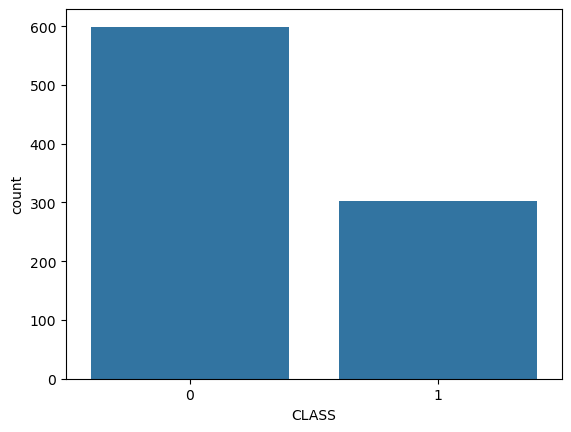

,NAME,android.permission.ACCESS_ALL_DOWNLOADS,android.permission.ACCESS_BLUETOOTH_SHARE,android.permission.ACCESS_CACHE_FILESYSTEM,android.permission.ACCESS_CHECKIN_PROPERTIES,android.permission.ACCESS_CONTENT_PROVIDERS_EXTERNALLY,android.permission.ACCESS_DOWNLOAD_MANAGER,android.permission.ACCESS_DOWNLOAD_MANAGER_ADVANCED,android.permission.ACCESS_DRM_CERTIFICATES,android.permission.ACCESS_EPHEMERAL_APPS,...,com.lsbr.ipsos.mobile.permission.C2D_MESSAGE,com.clue.android.permission.C2D_MESSAGE,com.amazon.dcp.metrics.permission.METRICS_PERMISSION,com.amdroidalarmclock.amdroid.permission.C2D_MESSAGE,android.permission.BROADCAST_PACKAGE_REPLACED,com.active.aps.meetmobile.permission.C2D_MESSAGE,com.android.email.permission.READ_ATTACHMENT,android.permission.ACCESS_CORSE_LOCATION,net.hubalek.android.apps.barometer.permission.C2D_MESSAGE,CLASS
0,a.envisionmobile.caa.apk,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,air.G2JCuteBoySwimmingEscape.apk,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,air.G2JSmallBoyFactoryEscape3.apk,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,air.G2JValentineRoseEscape2017.apk,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,air.com.adobe.connectpro.apk,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
# Display visualisation in a statistical graphic.
sns.countplot(x=df["CLASS"])
plt.show()

df.head(5)

Variable "NAME" is not an important feature since model will only be focusing on data that can be trained to predict malware

**Features** are the descriptive attributes, and **label** is what you're attempting to predict or forecast.

Thus, for x-axis, we will be using all the features columns except "CLASS" and "NAME". For y-axis, we will be using "CLASS" label.

In [44]:
x = df.drop(['CLASS', 'NAME'], axis=1) #axis = 0 (drop by index), axis = 1 (drop by columns)
x.head()

,android.permission.ACCESS_ALL_DOWNLOADS,android.permission.ACCESS_BLUETOOTH_SHARE,android.permission.ACCESS_CACHE_FILESYSTEM,android.permission.ACCESS_CHECKIN_PROPERTIES,android.permission.ACCESS_CONTENT_PROVIDERS_EXTERNALLY,android.permission.ACCESS_DOWNLOAD_MANAGER,android.permission.ACCESS_DOWNLOAD_MANAGER_ADVANCED,android.permission.ACCESS_DRM_CERTIFICATES,android.permission.ACCESS_EPHEMERAL_APPS,android.permission.ACCESS_FM_RADIO,...,android.permission.C2D_MESSAGE,com.lsbr.ipsos.mobile.permission.C2D_MESSAGE,com.clue.android.permission.C2D_MESSAGE,com.amazon.dcp.metrics.permission.METRICS_PERMISSION,com.amdroidalarmclock.amdroid.permission.C2D_MESSAGE,android.permission.BROADCAST_PACKAGE_REPLACED,com.active.aps.meetmobile.permission.C2D_MESSAGE,com.android.email.permission.READ_ATTACHMENT,android.permission.ACCESS_CORSE_LOCATION,net.hubalek.android.apps.barometer.permission.C2D_MESSAGE
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
y=df["CLASS"]
y

0      0
1      0
2      0
3      0
4      0
      ..
896    1
897    1
898    1
899    1
900    1
Name: CLASS, Length: 901, dtype: int64

In [46]:
# import KNN model to perform malware prediction
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

A dataset consists alot of data that we can spilt into 80-20 such that 80% of the data is used for training while 20% of the data is used to test the accuracy of our model.

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y, shuffle=True, test_size=0.2, stratify=y)

In [48]:
y_train.value_counts()

CLASS
0    479
1    241
Name: count, dtype: int64

In [49]:
y_test.value_counts()

CLASS
0    120
1     61
Name: count, dtype: int64

In KNN, K is a hyperparameter that is used to tune our model. There are 2 classes, thus typically used K will be 3, 5, 7 etc.

The reason why any small values of K (3,5, 7 etc) are used is because they tend to reduce **bias** (error due to overly simplistic models), but increase **variance** (sensitivity to noise in data)

For example, if K is too small (K = 1), the model might be too sensitive to the training data, leading to overfitting.

But if K is with right amount (K = 3, 5), the model smooths out some noise and still has the ability to capture important data patterns.

If K is too large (K = 11, 15), the model smooth the decision boundaries even more, reducing variance but increasing bias, which underfits the data

In [50]:
# train model with training data: x_train, y_train
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [51]:
# model.score returns the mean accuracy on the given test data and labels
model.score(x_test,y_test)

0.9392265193370166

Above achieved a 94% accuracy score on unseen test data samples 

In [52]:
# Test the model to do some classification using 20% test data on whether it is malware or not
pred=model.predict(x_test)
pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0], dtype=int64)

In [53]:
# Compare the above test data with y_test to check if the above test data is correct
y_test

137    0
24     0
42     0
429    0
431    0
      ..
855    1
468    0
351    0
868    1
491    0
Name: CLASS, Length: 181, dtype: int64

However these data above are very difficult to compare.

We can make use of dataframe to put the data size by size for easy comparison.

In [54]:
result=pd.DataFrame({
    "Actual_Value":y_test,
    "Predict_Value":pred
})
result

,Actual_Value,Predict_Value
137,0,0
24,0,0
42,0,0
429,0,0
431,0,0
...,...,...
855,1,1
468,0,1
351,0,0
868,1,1


There are approximately 180 rows of data in the test data and it is too tedious to check through row by row on its accuracy.

In **sklearn.metrics**, there are classification report, confusion matrix and accuracy score that we can use to check how accuracy is this model when tested on our test data.



## **Classification report** shows the Precision, Recall, F1-Score and Support.

**Precision** is defined as as the ratio of true positives to the sum of true and false positives.
Precision = True Positive / (True Positive + False Positive)

**Recall** is defined as the ratio of true positives to the sum of true positives and false negatives.
Recall = True Positive / (True Positive + False Negative)

The **F1 score** is a weighted harmonic mean of precision and recall
F1 score = 2 x Precision x Recall / (Precision + Recall)

**Support** is the number of actual occurrences of the class in the specified dataset.

In [55]:
#Evaluate the model on the TRAIN data set
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = model.predict(x_train)
print('Classification Report: \n', classification_report(y_train ,pred ))

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       479
           1       0.91      0.95      0.93       241

    accuracy                           0.95       720
   macro avg       0.94      0.95      0.94       720
weighted avg       0.95      0.95      0.95       720



In [56]:
# Check the confusion matrix and accuracy
print('Confusion Matrix: \n',confusion_matrix(y_train,pred))
print('\nAccuracy: ', accuracy_score(y_train,pred))

Confusion Matrix: 
 [[455  24]
 [ 12 229]]

Accuracy:  0.95


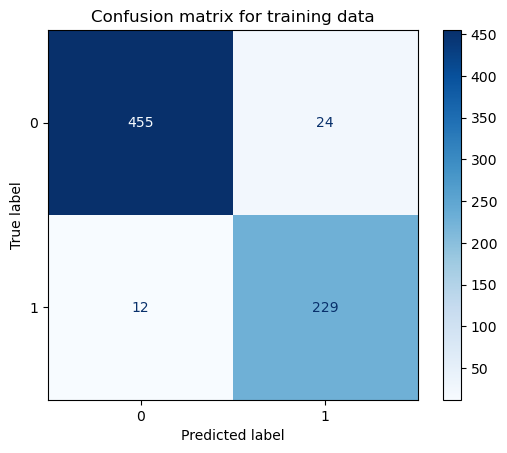

In [57]:
# Display confusion matrix for easier visualisation
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, x_train, y_train,
                                          labels=model.classes_,
                                          cmap=plt.cm.Blues,
                                          values_format='')

plt.title("Confusion matrix for training data")
plt.show()

*  The confusion matrix is a 2x2 table that summarizes the classification results for binary classification problem.
---
*  The layout of matrix is as follows:

  [ True Negative (TN) False Positive (FP)

  False Negative (FN) True Positive (TP) ]

---


*   **Top-left (455):** True Negative
  - where model correctly predicted class 0 (negative class)

*   **Top-right (24):** False Positive
  - where model incorrectly predicted class 1 (positive class) (Known as Type I error)

*   **Bottom-left (14):** False Negative
 - where model incorrectly predicted class 0 (negative class) (Known as Type II error)

*   **Bottom-right (277):** True Positive
 -  where model correctly predicted class 1 (positive class)








In [58]:
#Evaluate the model on the TEST data
pred = model.predict(x_test)
print(classification_report(y_test ,pred ))
print('Confusion Matrix: \n',confusion_matrix(y_test,pred))
print()
print('Accuracy: ', accuracy_score(y_test,pred))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       120
           1       0.88      0.95      0.91        61

    accuracy                           0.94       181
   macro avg       0.93      0.94      0.93       181
weighted avg       0.94      0.94      0.94       181

Confusion Matrix: 
 [[112   8]
 [  3  58]]

Accuracy:  0.9392265193370166


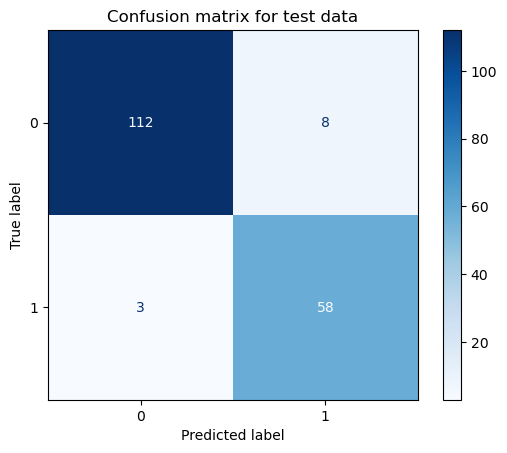

In [59]:
ConfusionMatrixDisplay.from_estimator(model, x_test, y_test,
                                          labels=model.classes_,
                                          cmap=plt.cm.Blues,
                                          values_format='')

plt.title("Confusion matrix for test data")
plt.show()


In conclusion, the KNN model achieved an accuracy of 95% on the training data and 93.9% on the test data. While the training accuracy is slightly higher, the test accuracy suggests that the model is generalizing well to unseen data most of the time.
- The precision and recall for classifying benign files (class 0) were particularly high, indicating that the model is good at identifying non-malicious files.
- However, there was room for improvement in the recall for malware (class 1), where the model missed a few instances.

